### Import Librarys
#### Remember to import your version of PSO

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PSO import PSO


%matplotlib inline

### Example of simulation execution
#### Remenber to execute your version of PSO

In [42]:
n_sim = 5 # number of simulations
results = pd.DataFrame() # create the results dataframe

for s in range(n_sim):
    pso = PSO(minf=-100, # initialize PSO with parameters, remember to add the objective function, im using the sphere function
              maxf=100,
              n_dim=30,
              swarm_size=30,
              n_iter=20000,
              min_init=50,
              max_init=100,
              up_w=0.7, # w fixed 0.7
              lb_w=0.7)
    pso.fit() # execute PSO
    results[f'sim_{s}'] = pso.gbest_track_iter # Save all the gbests in a column of the results dataframe

results.to_csv(f'pso_sphere_global_{n_sim}_fixed_w.csv', index=False) # Save the dataframe in your directory

100%|██████████| 20000/20000 [00:03<00:00, 5376.40it/s]


### Curve of Convergence

In [69]:
results_fixed_w = pd.read_csv('pso_sphere_global_30_fixed_w.csv') # Read the dataframe from execution

results_fixed_w.tail()  # tail() shows the last rows of dataset ---- head() shows the firsts

,sim_0,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,...,sim_20,sim_21,sim_22,sim_23,sim_24,sim_25,sim_26,sim_27,sim_28,sim_29
9996,0.144922,1.744104,0.066191,0.116758,0.109502,0.644012,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905
9997,0.144922,1.744104,0.066191,0.116758,0.109502,0.644012,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905
9998,0.144922,1.744104,0.066191,0.116758,0.109502,0.643955,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905
9999,0.144922,1.744104,0.066191,0.116758,0.109502,0.643955,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905
10000,0.144922,1.744104,0.066191,0.116758,0.109502,0.643955,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905


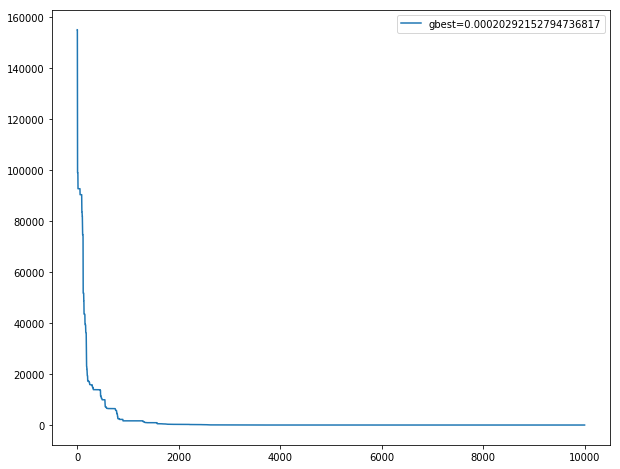

In [70]:
# Plot convergence curve from first simulation (sim_0) with the label of minimum value --- figsize(width, height)
results_fixed_w['sim_0'].plot(legend=True, label='gbest=' + str(results['sim_0'].min()), figsize=(10,8))

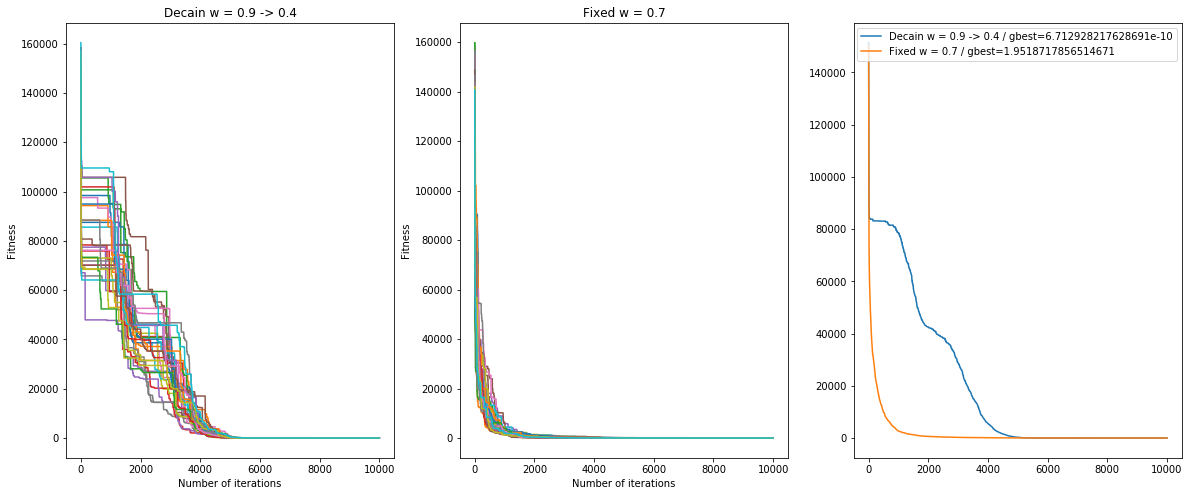

In [71]:
# Read dataframes from simulations with decain w and fixed w
n_sim = 30
decain_w = pd.read_csv(f'pso_sphere_global_{n_sim}_decain_w.csv')
fixed_w = pd.read_csv(f'pso_sphere_global_{n_sim}_fixed_w.csv')

f, ax = plt.subplots(1, 3, figsize=(20, 8)) # Initialize plot

# For each dataframe
for i, df, title in zip(range(2), [decain_w, fixed_w],
                        ['Decain w = 0.9 -> 0.4', 'Fixed w = 0.7']):
    df.plot(legend=False, ax=ax[i]) # Plot curves of convergence of all 30 simulations on ax[i]
    ax[i].set_title(title)
    ax[i].set_xlabel('Number of iterations')
    ax[i].set_ylabel('Fitness')
    ax[2].plot(df.mean(axis=1), label=title + ' / gbest=' + str(df.mean(axis=1).min())) # Plot the mean curve of convergence on the third plot 
    ax[2].legend() # enable legend

plt.savefig('ConvegenceCurve.png') # Save figure --- plt.savefig(path_to_save)

### Boxplot

In [78]:
fixed_w = pd.read_csv('pso_sphere_global_30_fixed_w.csv') # read dataframe

fixed_w.tail(1) # Last row of all simulations, that is all the best gbest values found

,sim_0,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,...,sim_20,sim_21,sim_22,sim_23,sim_24,sim_25,sim_26,sim_27,sim_28,sim_29
10000,0.144922,1.744104,0.066191,0.116758,0.109502,0.643955,0.421585,16.05066,4.552409,1.76098,...,4.102015,0.208672,0.1729,5.604945,0.422063,0.689148,0.133701,0.330655,0.493032,0.37905


In [79]:
fixed_w.tail(1).values.ravel() # transform the last row in a list 

array([ 0.14492235,  1.74410436,  0.06619141,  0.11675822,  0.10950183,
        0.64395548,  0.42158464, 16.05066008,  4.55240927,  1.76097981,
        0.85366956,  2.06018195,  0.95836923,  1.49596813,  0.66607281,
        0.3654917 ,  3.58689518,  7.39483314,  1.79643153,  1.23099138,
        4.10201487,  0.20867219,  0.17290044,  5.60494453,  0.42206331,
        0.68914816,  0.13370134,  0.33065468,  0.49303228,  0.3790497 ])

Text(0.5, 1.0, 'Histogram fixed w')

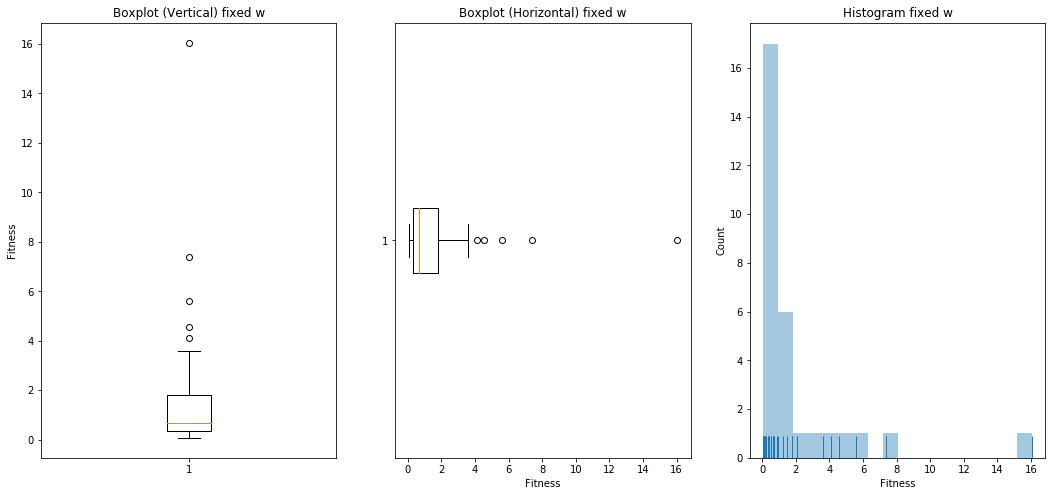

In [122]:
bests = fixed_w.tail(1).values.ravel() # Best gbest values found

f, ax = plt.subplots(1, 3, figsize=(18, 8)) # initialize the plot

ax[0].boxplot(bests, vert=True) # plot vertical boxplot on first axis
ax[1].boxplot(bests, vert=False) # plot horizontal boxplot on second axis

# plot histogram with  rug plot on third axis
sns.distplot(bests,hist=True, kde=False, rug=True, ax=ax[2]) 

ax[0].set_ylabel('Fitness') # set y label boxplot
ax[1].set_xlabel('Fitness') # set x label because is horizontal 

ax[2].set_ylabel('Count') # set x label histogram
ax[2].set_xlabel('Fitness') # set y label histogram

# Set both titles
ax[0].set_title('Boxplot (Vertical) fixed w')
ax[1].set_title('Boxplot (Horizontal) fixed w')
ax[2].set_title('Histogram fixed w')

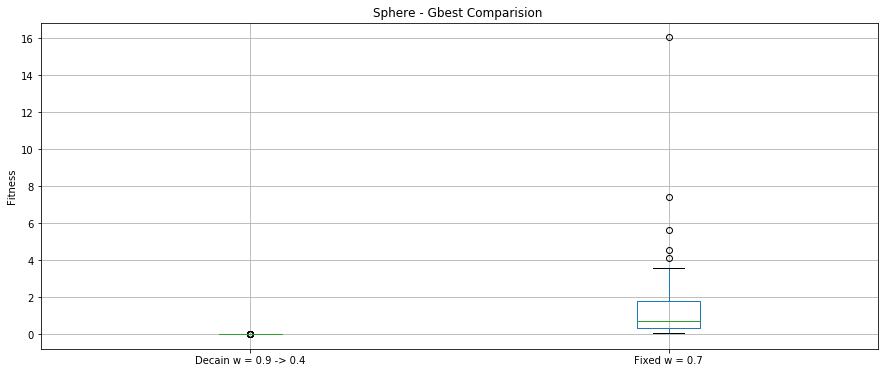

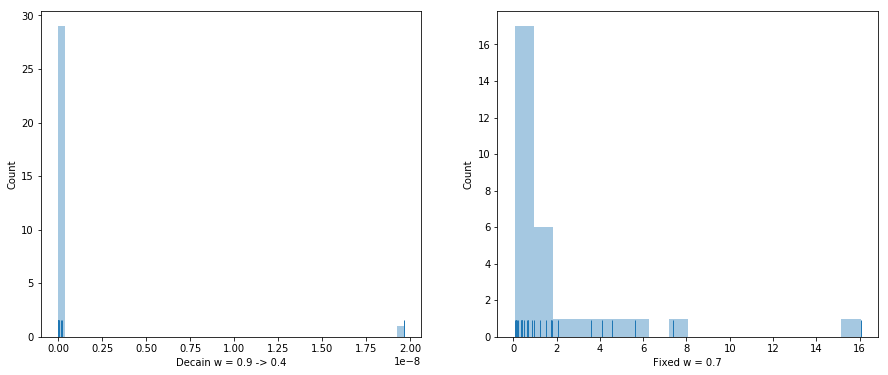

In [118]:
bp = pd.DataFrame() # create dataframe to organize results

# for each dataframe
for i, df, title in zip(range(2), [decain_w, fixed_w], ['Decain w = 0.9 -> 0.4', 'Fixed w = 0.7']):
    bp[title] = df.tail(1).values.ravel() # get best values from the last row

f, ax = plt.subplots(figsize=(15, 6)) # initialize first plot

bp.boxplot(ax=ax) # plot boxplot on first axis
ax.set_title('Sphere - Gbest Comparision ')
ax.set_ylabel('Fitness') # set y label

f, ax = plt.subplots(1, 2, figsize=(15, 6)) # initialize second plot

for i, title in enumerate(['Decain w = 0.9 -> 0.4', 'Fixed w = 0.7']):
    sns.distplot(bp[title],hist=True, kde=False, rug=True, ax=ax[i])
    ax[i].set_ylabel('Count')
    
plt.savefig('ConvergenceBoxplot.png') # save figure